A good way to reduce overfitting is to regularize the model (i.e., to constrain it); the fewer degrees of freedom the model has, the harder it will be to overfit to the training data.

With linear models, regularization is typically achieved by constraining the weights of the model.

<h3>Ridge regression</h3>

Ridge regression adds a penalty term to the linear regression objective function (RSS) that is equal to the sum of the squared weights (regression coefficients). This forces the learning algorithm to not only fit the data well but to also keep the model weights as small as possible. The ridge regression objective function is

\begin{equation*}
    \mathcal{J}(\boldsymbol{\theta}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \, + \lambda \sum_{j=1}^{p} \theta_j^2,
\end{equation*}

where $\, \lambda \,$ is a non-negative tuning (hyper)parameter. The larger $\, \lambda \,$ is, the stronger the penalty, and therefore the more constrained the model will be. Interestingly, when $\, \lambda = 0, \,$ ridge regression reduces to regular OLS, and when $\, \lambda \rightarrow \infty, \,$ the model coefficients shrink towards zero, but never to exactly zero (unlike with LASSO).

Ridge regression reduces variance by constraining the model coefficients, which helps to prevent overfitting (at the cost of introducing some bias into the model) (bias-variance trade-off).

**NOTE:**

- The regularization term should only be added to the cost function during training.
- Once the model is trained, you want to use the unregularized MSE to evaluate the model's performance.
- Note also that we do not regularize the intercept (bias) term.
- It is important to scale the features before performing ridge regression (this actually applies to most regularization techniques, since they are sensitive to the scale of the features).

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, Ridge, LinearRegression

In [30]:
X = 2 * np.random.normal(size=(100,1))
y = 3 + 0.5 * X + np.random.normal(loc=3, scale=8, size=(100,1))

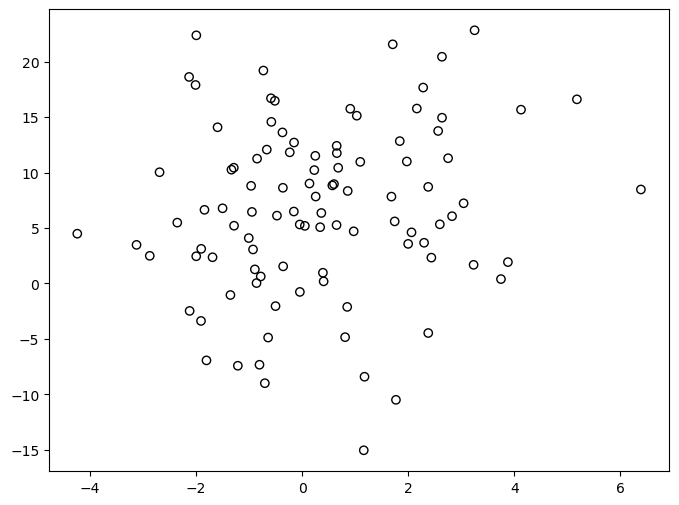

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, facecolors='none', edgecolors='black');

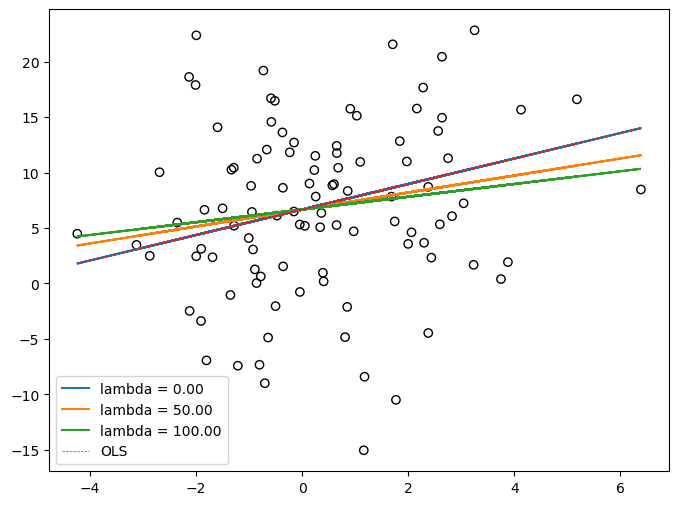

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, facecolors='none', edgecolors='black')
lambdas = np.linspace(0, 100, 3)

for i in range(len(lambdas)):
    model = make_pipeline(StandardScaler(),
                          Ridge(alpha=lambdas[i], fit_intercept=True))
    model.fit(X, y)
    ridge_reg = model.named_steps['ridge']
    y_pred_train = ridge_reg.predict(X)
    
    plt.plot(X, y_pred_train, label=f'lambda = {lambdas[i]:.2f}')
    plt.legend()

# OLS
ols = make_pipeline(StandardScaler(),
                    LinearRegression(fit_intercept=True))
ols.fit(X, y)
y_pred_ols = ols.named_steps['linearregression'].predict(X)
plt.plot(X, y_pred_ols, linestyle='dashed', linewidth=0.5, label='OLS')
plt.legend();

- As can be seen, in Ridge, when $\, \lambda = 0, \,$ we get the same solution as with OLS.
- On the other hand, when $\, \lambda \rightarrow \infty \,$ (well only 100 in this case, but the point is that when $\, \lambda \,$ gets larger), the Ridge regression predictions approach the null model (i.e., the model that contains only the intercept (bias) term, and therefore it predicts that $\, y_i = \theta_0, \, \forall i \,$).
- This is illustrated in the graph such that when $\, \lambda \,$ grows, the prediction function effectively turns more and more into a horizontal line, representing the value of the intercept term.

In [42]:
ols.named_steps['linearregression'].intercept_

array([6.66615489])